# drawing the loss figures

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import AllChem

In [2]:
# read the data in logs folder
charnn_history = pd.read_csv('logs/charnn_history.csv')
charnn_cl_history = pd.read_csv('logs/charnn_contrastive_history.csv')

clamer_history = pd.read_csv('logs/clamer_history.csv')
clamer_cl_history = pd.read_csv('logs/clamer_contrastive_history.csv')

ddc_history = pd.read_csv('logs/ddc_history.csv')
ddc_cl_history = pd.read_csv('logs/ddc_contrastive_history.csv')

gpt_history = pd.read_csv('logs/gpt_history.csv')
gpt_cl_history = pd.read_csv('logs/gpt_contrastive_history.csv')

In [3]:
def first_10_values(data):
    if len(data) > 10:
        return data[:10]
    else:
        return data

# get the first 10 values of the loss
charnn_history = charnn_history.apply(first_10_values)
charnn_cl_history = charnn_cl_history.apply(first_10_values)

clamer_history = clamer_history.apply(first_10_values)
clamer_cl_history = clamer_cl_history.apply(first_10_values)

ddc_history = ddc_history.apply(first_10_values)
ddc_cl_history = ddc_cl_history.apply(first_10_values)

gpt_history = gpt_history.apply(first_10_values)
gpt_cl_history = gpt_cl_history.apply(first_10_values)

In [4]:
# get the train_loss, test_loss, train_acc, test_acc
charnn_train_loss = charnn_history['train_loss']
charnn_test_loss = charnn_history['test_loss']
charnn_train_acc = charnn_history['train_acc']
charnn_test_acc = charnn_history['test_acc']

# get the train_loss, test_loss, train_acc, test_acc, train_ce_loss,test_ce_loss,train_info_loss,test_info_loss
charnn_cl_train_loss = charnn_cl_history['train_loss']
charnn_cl_test_loss = charnn_cl_history['test_loss']
charnn_cl_train_acc = charnn_cl_history['train_acc']
charnn_cl_test_acc = charnn_cl_history['test_acc']
charnn_cl_train_ce_loss = charnn_cl_history['train_ce_loss']
charnn_cl_test_ce_loss = charnn_cl_history['test_ce_loss']
charnn_cl_train_info_loss = charnn_cl_history['train_info_loss']
charnn_cl_test_info_loss = charnn_cl_history['test_info_loss']

clamer_train_loss = clamer_history['train_loss']
clamer_test_loss = clamer_history['test_loss']
clamer_train_acc = clamer_history['train_acc']
clamer_test_acc = clamer_history['test_acc']

clamer_cl_train_loss = clamer_cl_history['train_loss']
clamer_cl_test_loss = clamer_cl_history['test_loss']
clamer_cl_train_acc = clamer_cl_history['train_acc']
clamer_cl_test_acc = clamer_cl_history['test_acc']
clamer_cl_train_ce_loss = clamer_cl_history['train_ce_loss']
clamer_cl_test_ce_loss = clamer_cl_history['test_ce_loss']
clamer_cl_train_info_loss = clamer_cl_history['train_info_loss']
clamer_cl_test_info_loss = clamer_cl_history['test_info_loss']

ddc_train_loss = ddc_history['train_loss']
ddc_test_loss = ddc_history['test_loss']
ddc_train_acc = ddc_history['train_acc']
ddc_test_acc = ddc_history['test_acc']

ddc_cl_train_loss = ddc_cl_history['train_loss']
ddc_cl_test_loss = ddc_cl_history['test_loss']
ddc_cl_train_acc = ddc_cl_history['train_acc']
ddc_cl_test_acc = ddc_cl_history['test_acc']
ddc_cl_train_ce_loss = ddc_cl_history['train_ce_loss']
ddc_cl_test_ce_loss = ddc_cl_history['test_ce_loss']
ddc_cl_train_info_loss = ddc_cl_history['train_info_loss']
ddc_cl_test_info_loss = ddc_cl_history['test_info_loss']

gpt_train_loss = gpt_history['train_loss']
gpt_test_loss = gpt_history['test_loss']
gpt_train_acc = gpt_history['train_acc']
gpt_test_acc = gpt_history['test_acc']

gpt_cl_train_loss = gpt_cl_history['train_loss']
gpt_cl_test_loss = gpt_cl_history['test_loss']
gpt_cl_train_acc = gpt_cl_history['train_acc']
gpt_cl_test_acc = gpt_cl_history['test_acc']
gpt_cl_train_ce_loss = gpt_cl_history['train_ce_loss']
gpt_cl_test_ce_loss = gpt_cl_history['test_ce_loss']
gpt_cl_train_info_loss = gpt_cl_history['train_info_loss']
gpt_cl_test_info_loss = gpt_cl_history['test_info_loss']

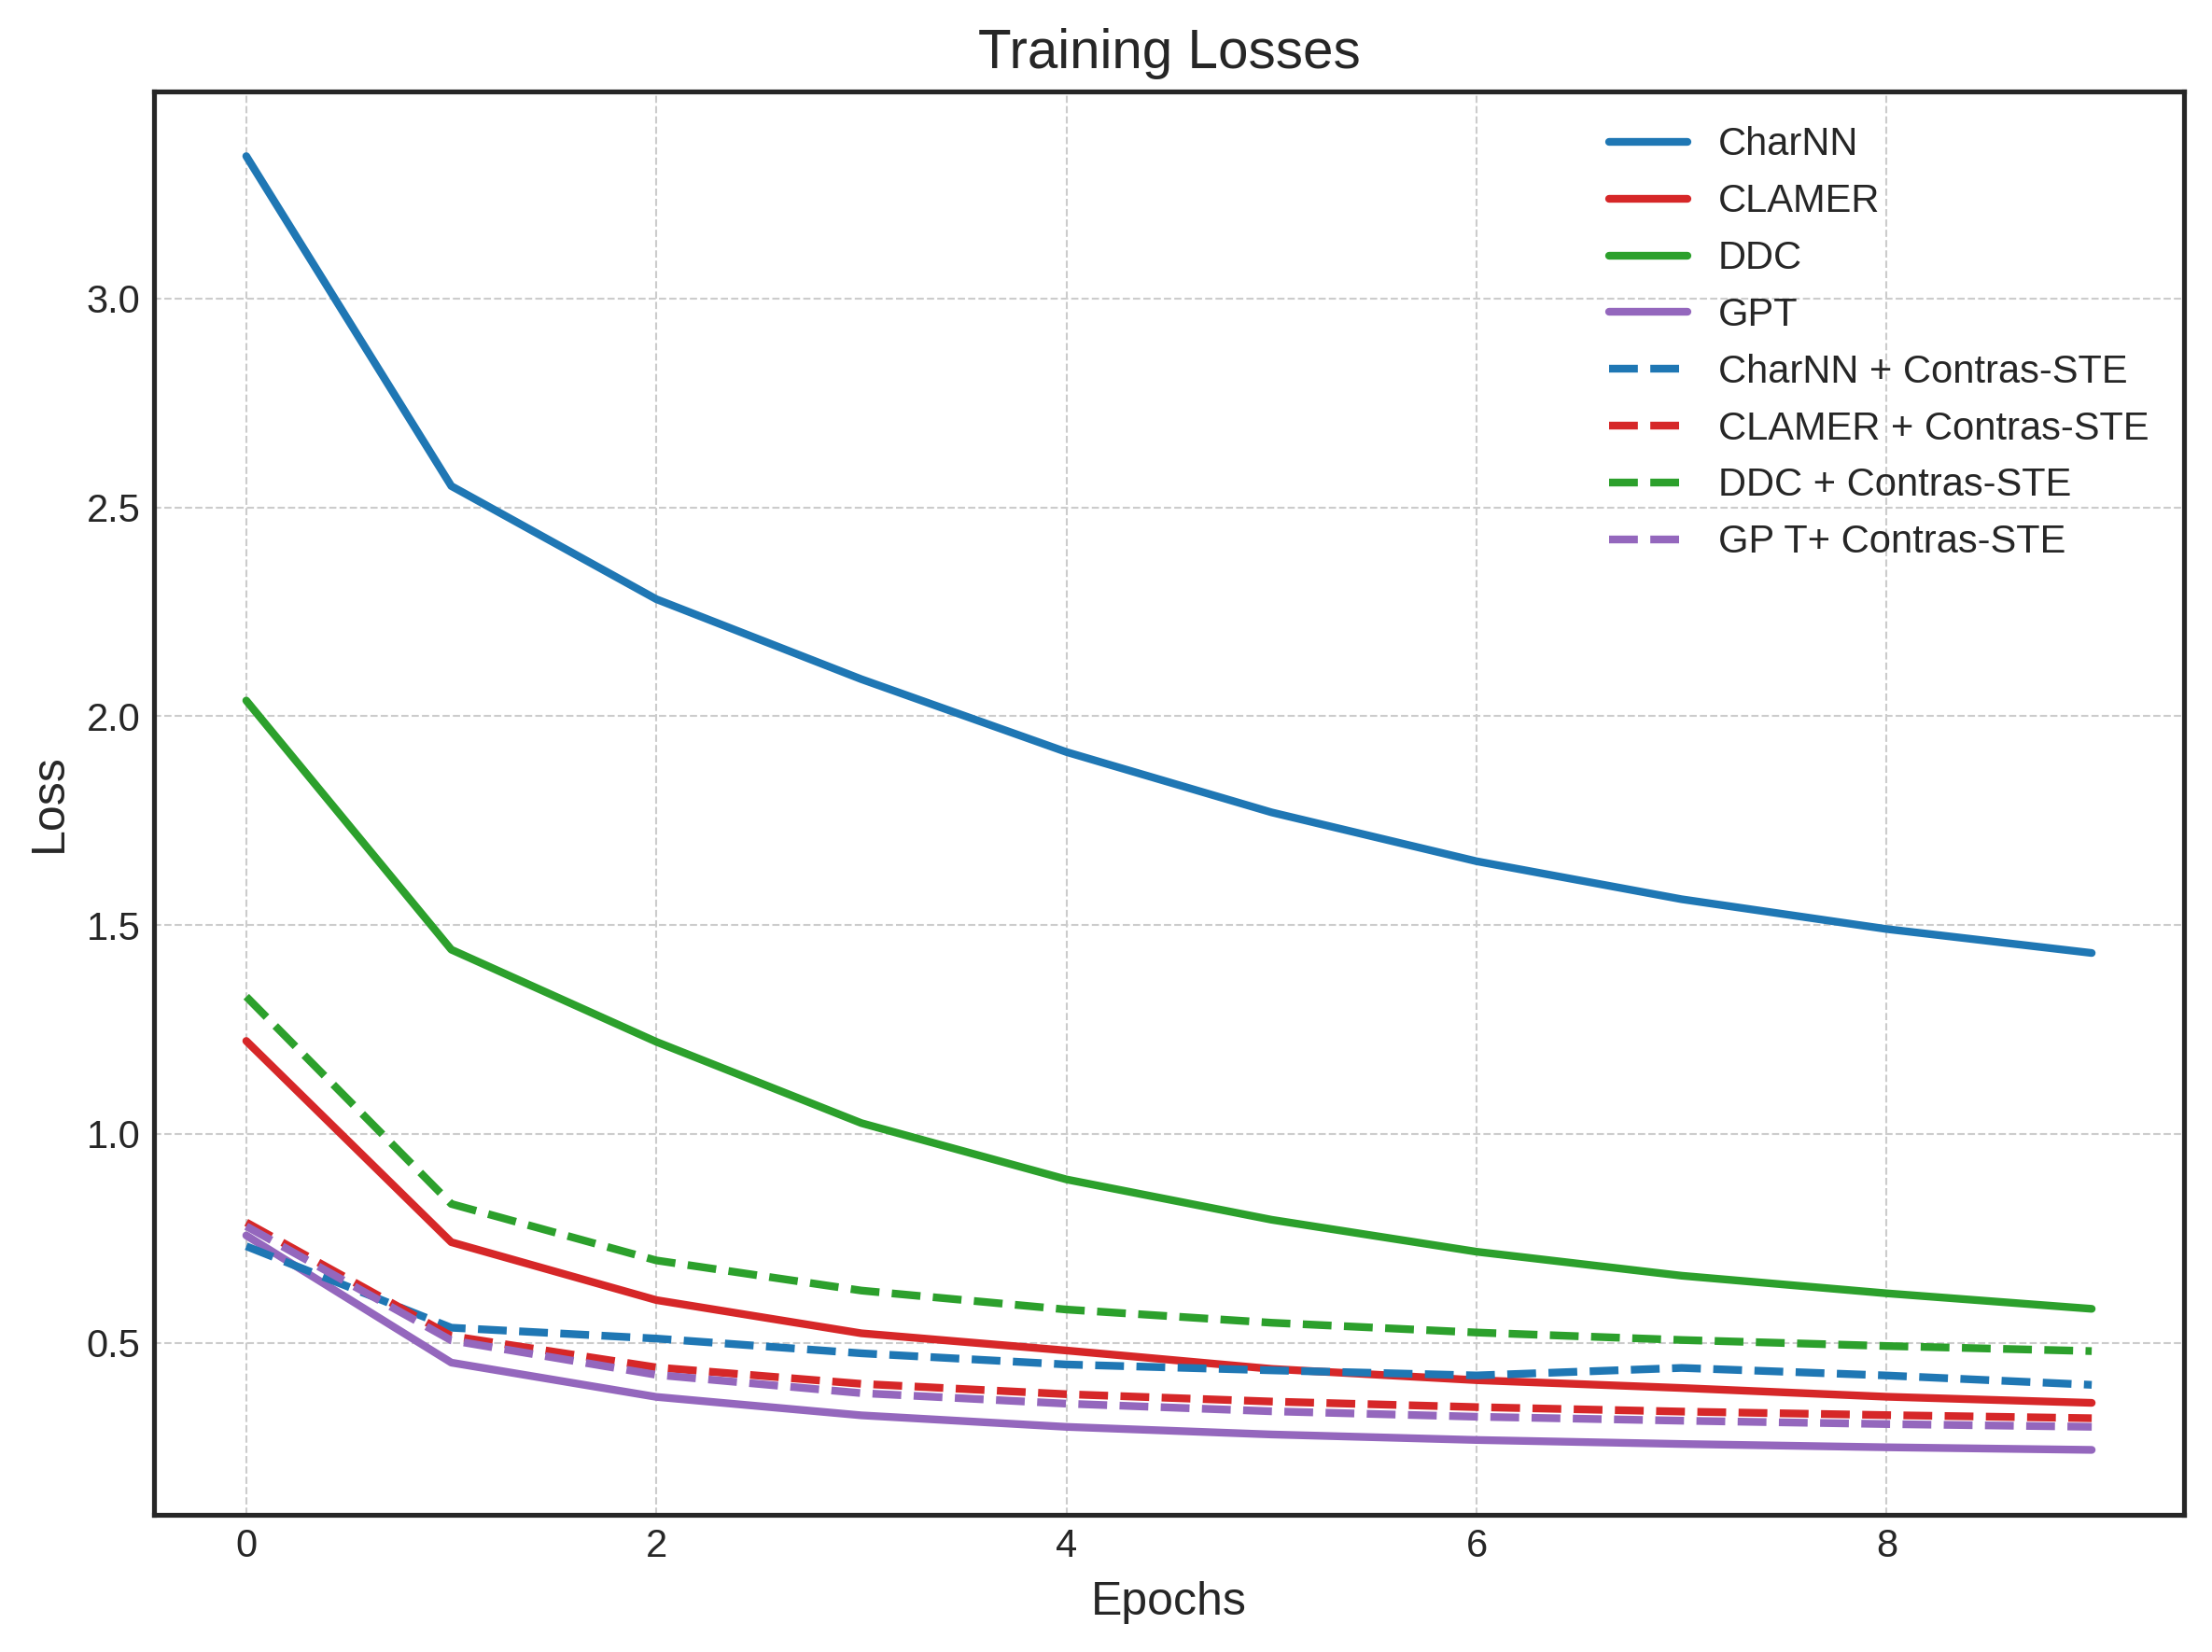

In [10]:
# plot the train_loss
# the same models with the same color lines
# the cl models with dashed lines

# Set figure size and style
plt.figure(figsize=(8, 6), dpi=300)  # Higher DPI for better resolution
plt.style.use('seaborn-white')  # Clean background, which is typical for academic papers

# Plot the main training losses with solid lines
plt.plot(charnn_train_loss, label='CharNN', color='tab:blue', linewidth=2)
plt.plot(clamer_train_loss, label='CLAMER', color='tab:red', linewidth=2)
plt.plot(ddc_train_loss, label='DDC', color='tab:green', linewidth=2)
plt.plot(gpt_train_loss, label='GPT', color='tab:purple', linewidth=2)

# Plot the contrastive losses with dashed lines
plt.plot(charnn_cl_train_ce_loss, label='CharNN + Contras-STE', color='tab:blue', linestyle='--', linewidth=2)
plt.plot(clamer_cl_train_ce_loss, label='CLAMER + Contras-STE', color='tab:red', linestyle='--', linewidth=2)
plt.plot(ddc_cl_train_ce_loss, label='DDC + Contras-STE', color='tab:green', linestyle='--', linewidth=2)
plt.plot(gpt_cl_train_ce_loss, label='GP T+ Contras-STE', color='tab:purple', linestyle='--', linewidth=2)

# Adding labels, title, and legend
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Cross-Entropy Loss on Training Set', fontsize=14)
plt.legend(loc='upper right', fontsize=10)

# Adjust grid, limits, and ticks for clarity
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()  # Ensure everything fits without overlap

# Show the plot
plt.show()

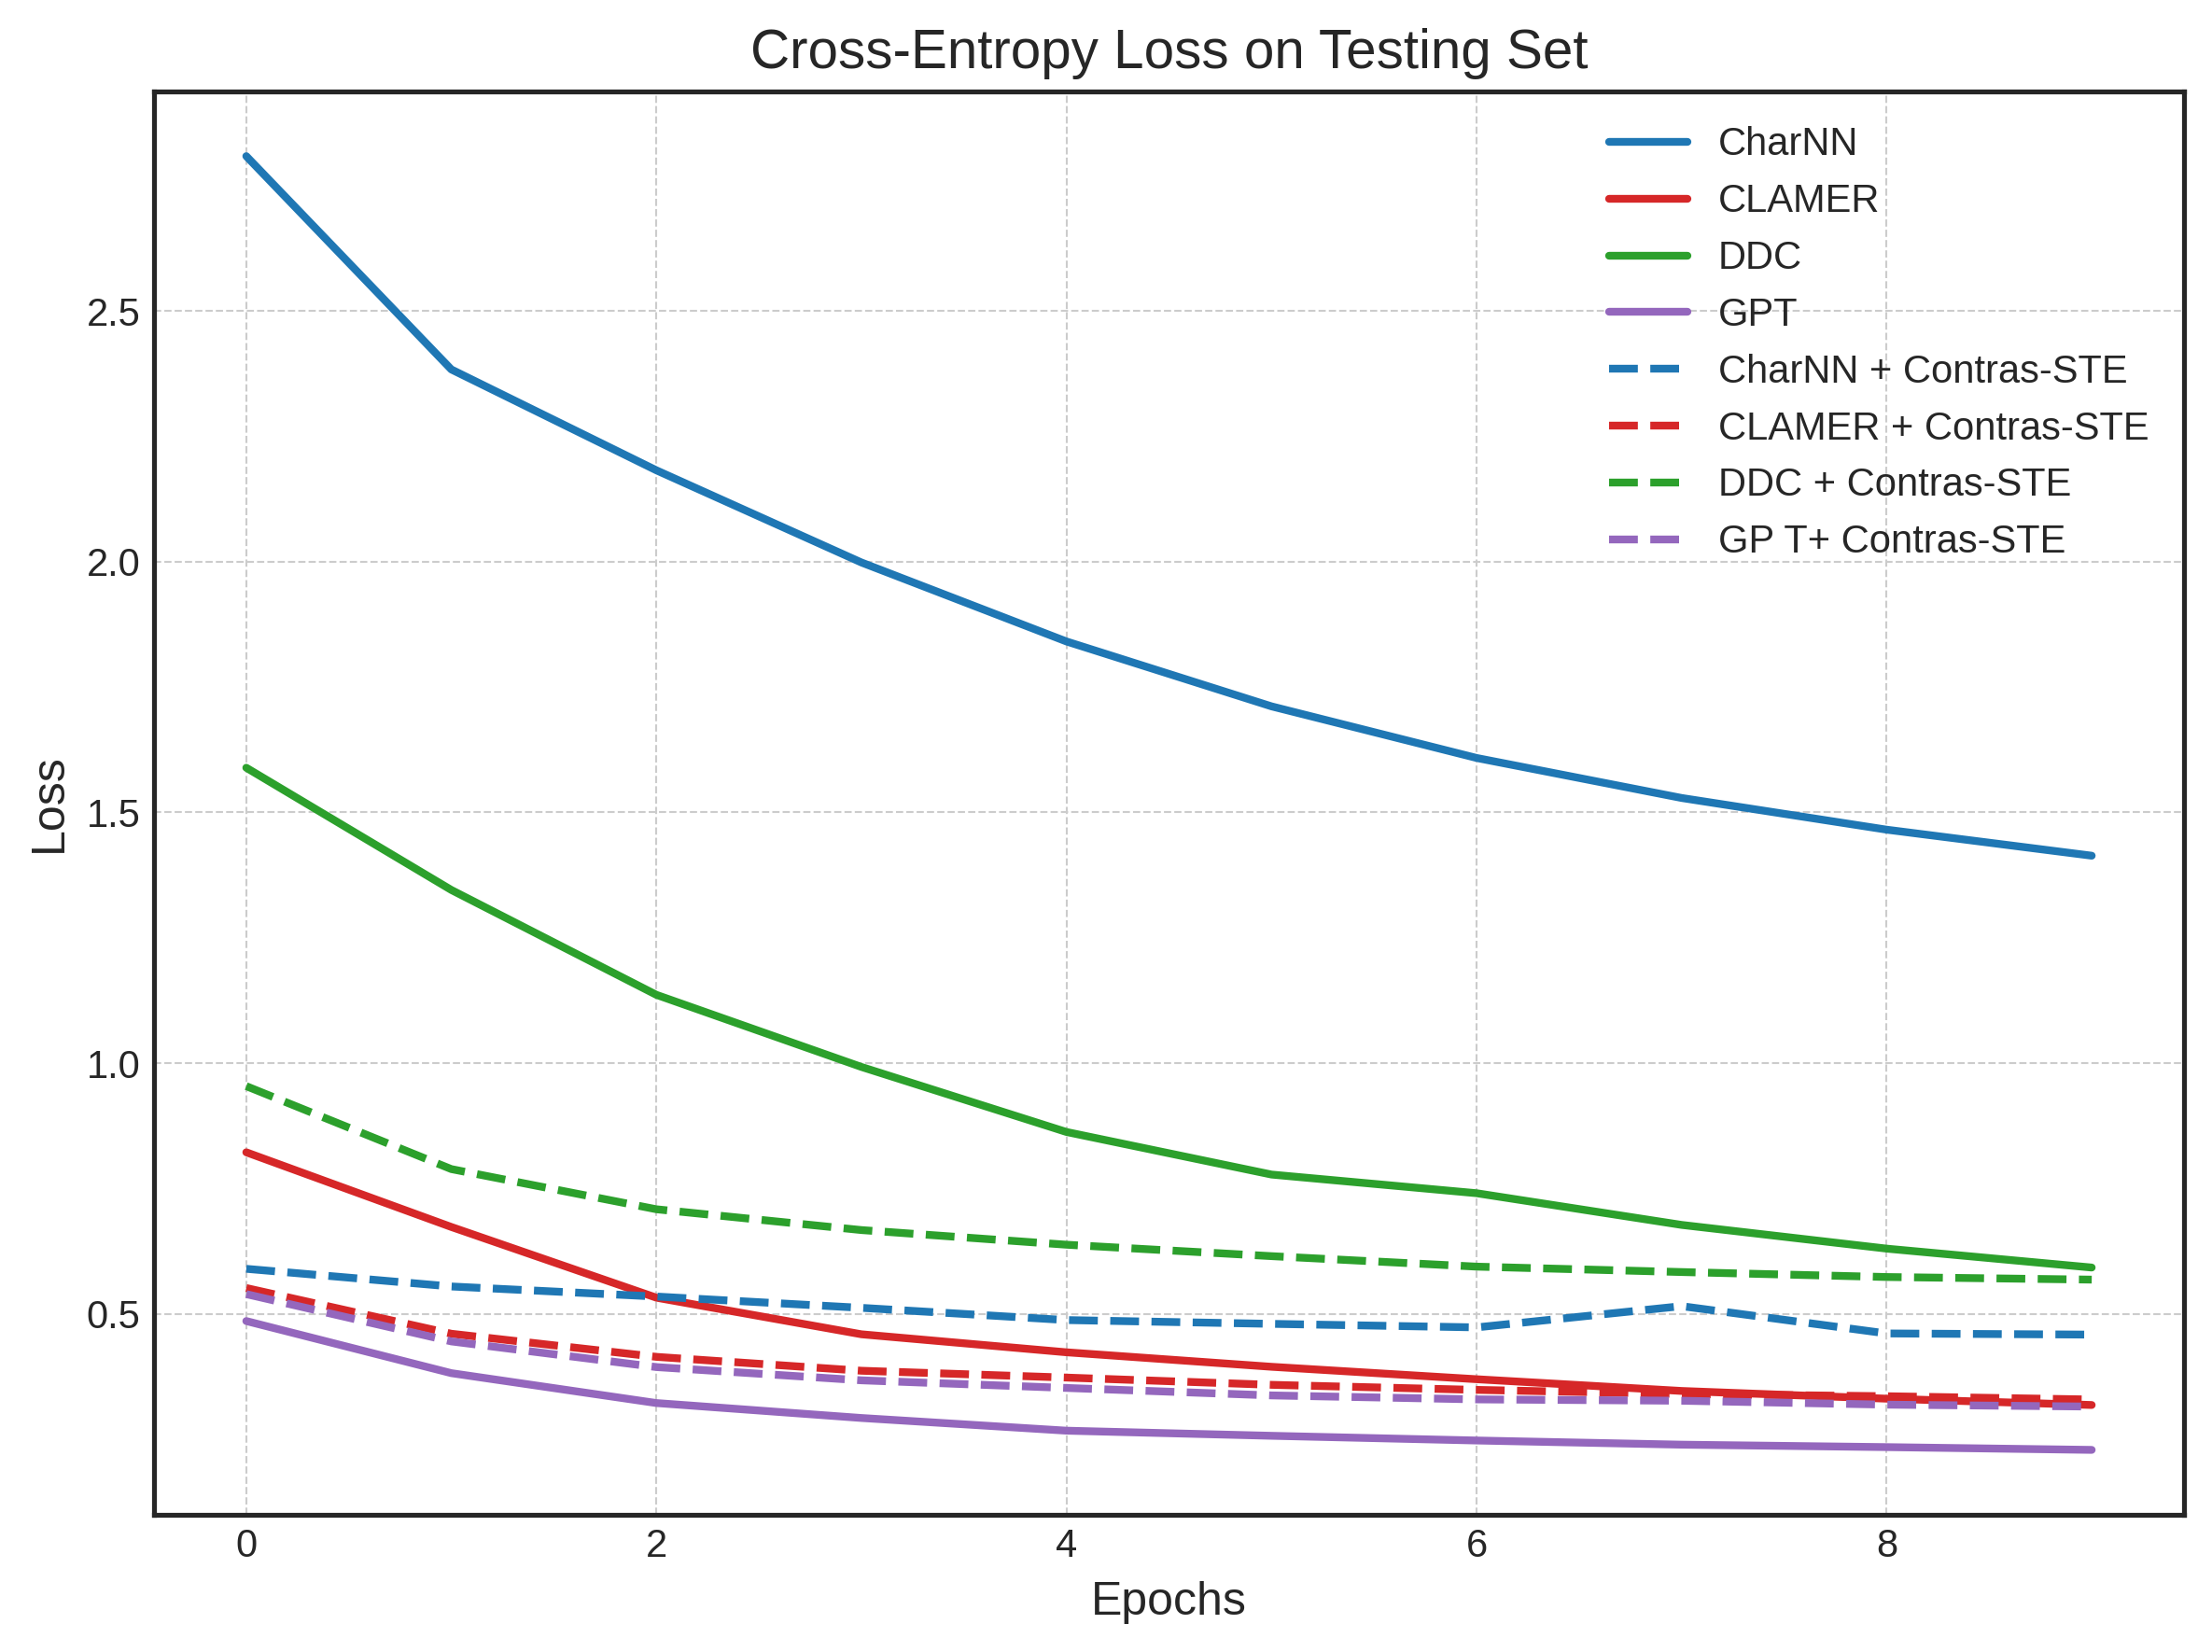

In [11]:
# plot the test_loss
# the same models with the same color lines
# the cl models with dashed lines

plt.figure(figsize=(8, 6), dpi=300)
plt.style.use('seaborn-white')

# Plot the main test losses with solid lines
plt.plot(charnn_test_loss, label='CharNN', color='tab:blue', linewidth=2)
plt.plot(clamer_test_loss, label='CLAMER', color='tab:red', linewidth=2)
plt.plot(ddc_test_loss, label='DDC', color='tab:green', linewidth=2)
plt.plot(gpt_test_loss, label='GPT', color='tab:purple', linewidth=2)

# Plot the contrastive losses with dashed lines
plt.plot(charnn_cl_test_ce_loss, label='CharNN + Contras-STE', color='tab:blue', linestyle='--', linewidth=2)
plt.plot(clamer_cl_test_ce_loss, label='CLAMER + Contras-STE', color='tab:red', linestyle='--', linewidth=2)
plt.plot(ddc_cl_test_ce_loss, label='DDC + Contras-STE', color='tab:green', linestyle='--', linewidth=2)
plt.plot(gpt_cl_test_ce_loss, label='GP T+ Contras-STE', color='tab:purple', linestyle='--', linewidth=2)

# Adding labels, title, and legend
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Cross-Entropy Loss on Testing Set', fontsize=14)
plt.legend(loc='upper right', fontsize=10)

# Adjust grid, limits, and ticks for clarity
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()  # Ensure everything fits without overlap

# Show the plot
plt.show()


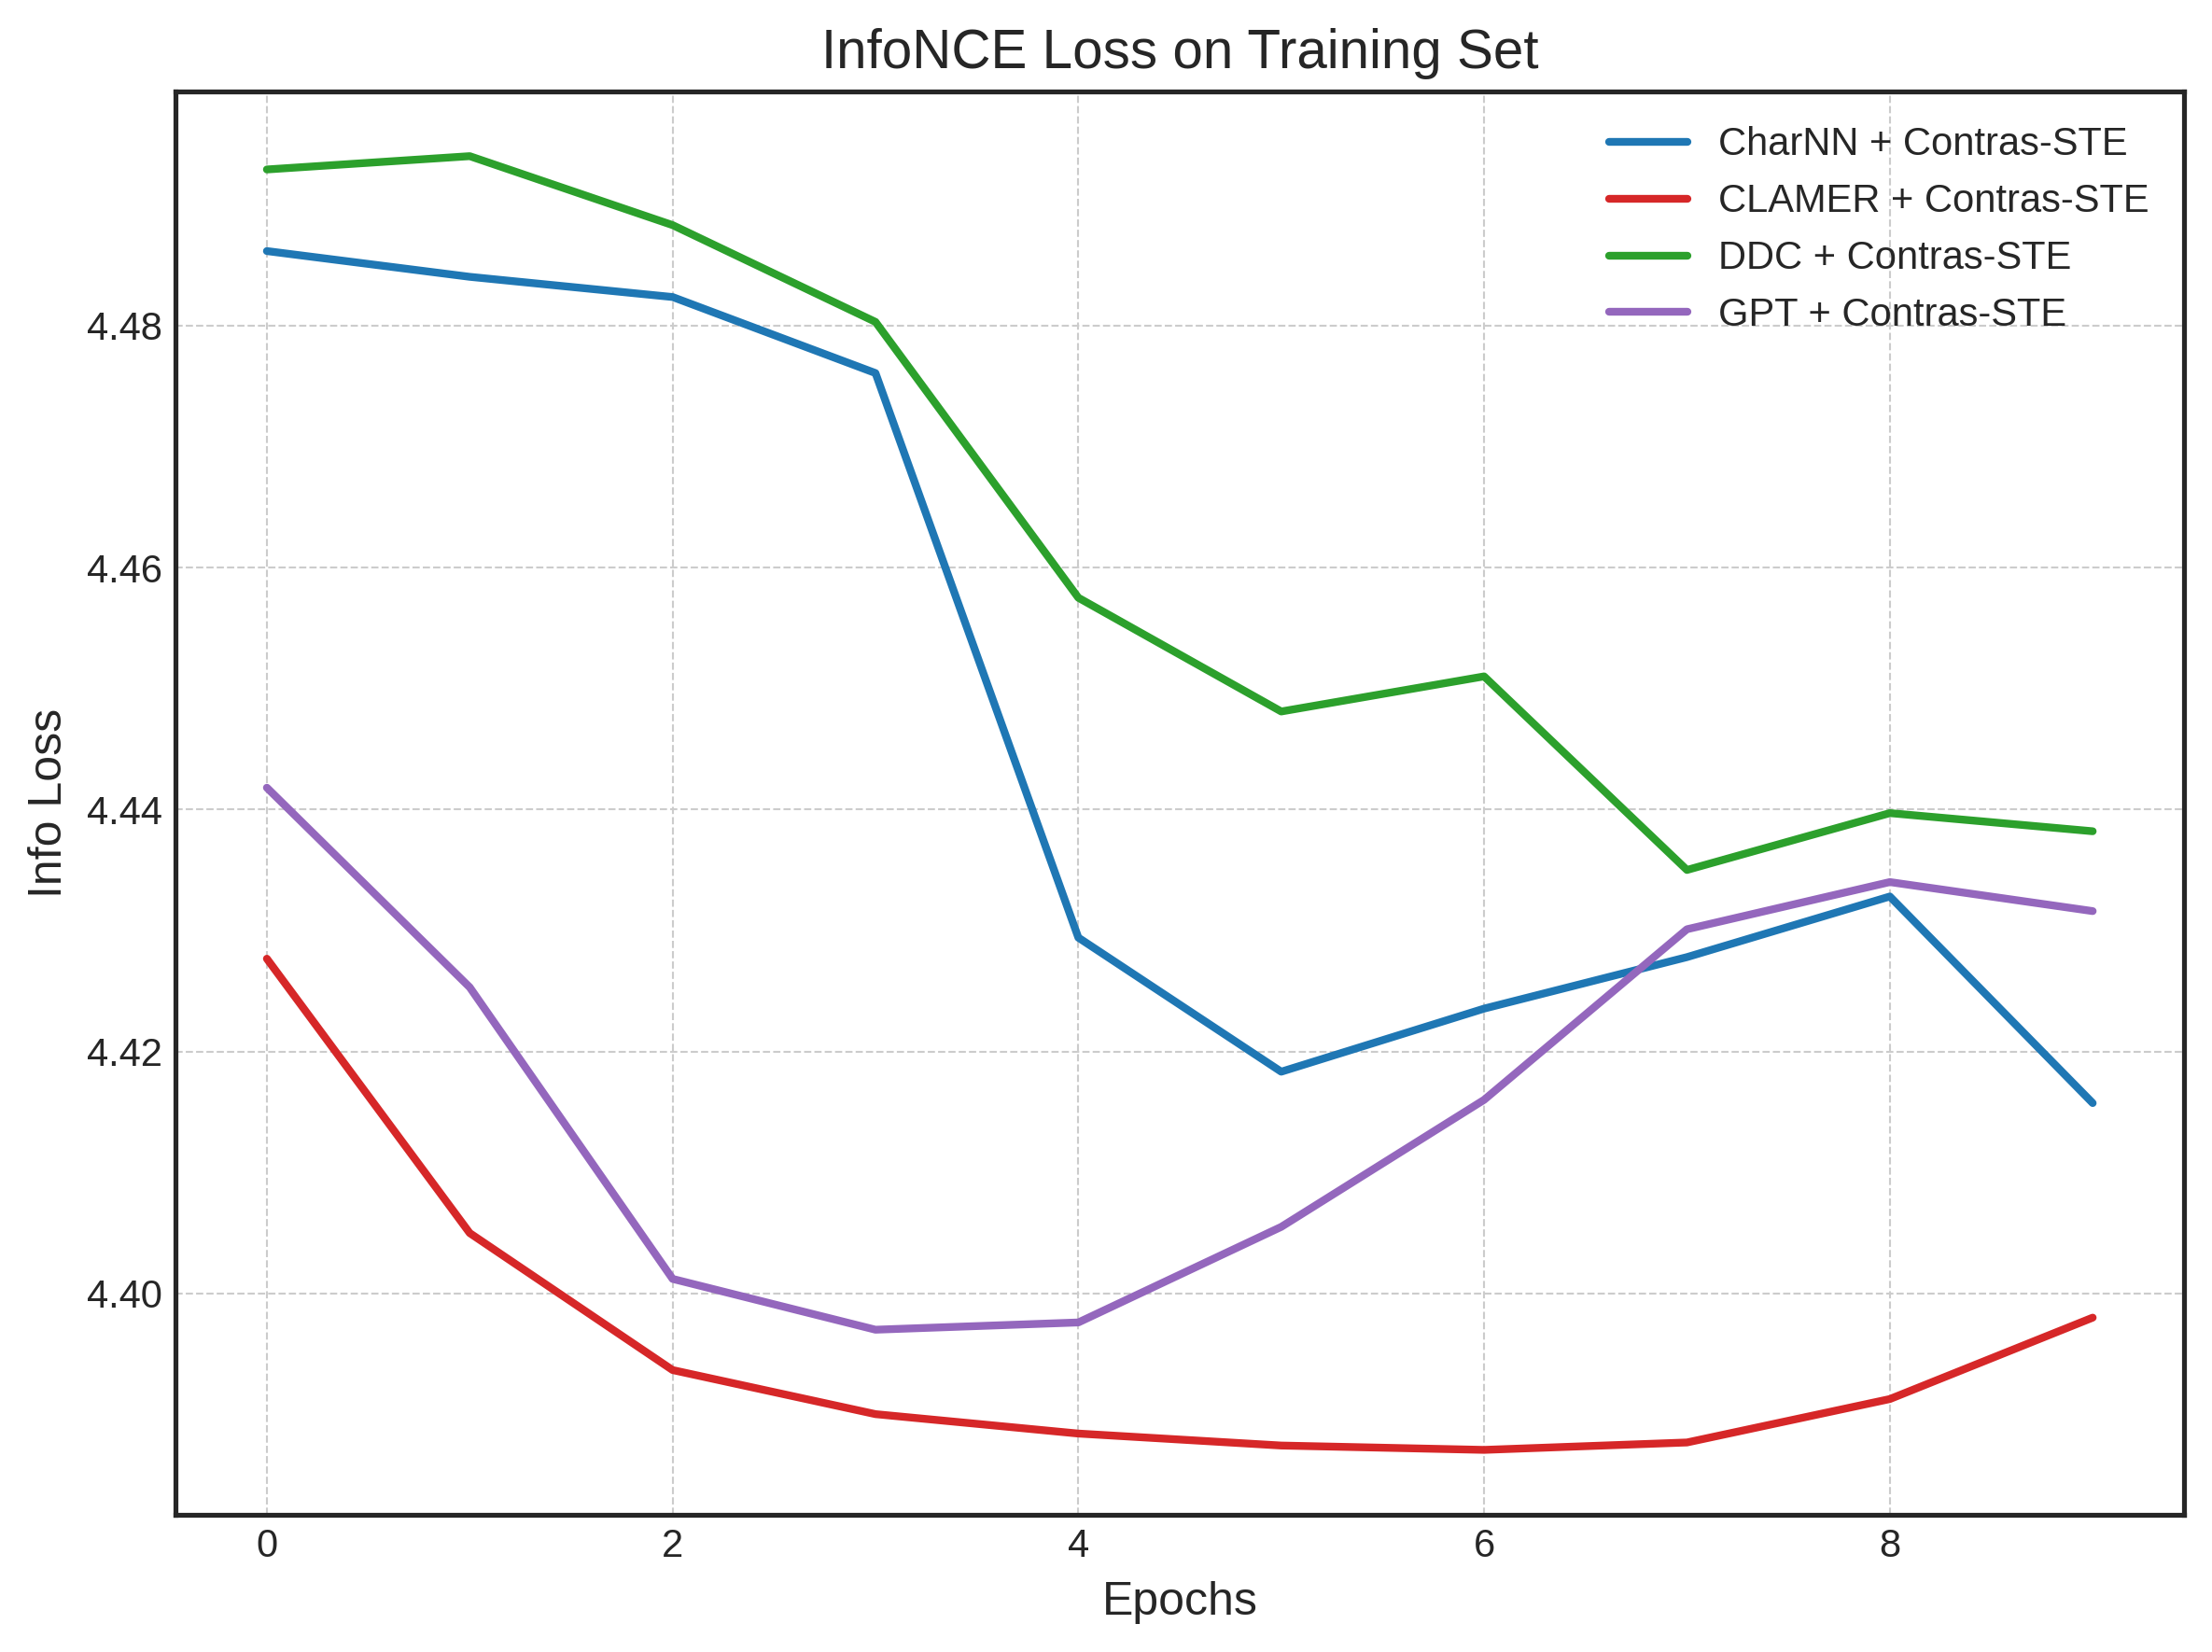

In [12]:
# plot the info_loss

# Set figure size and style
plt.figure(figsize=(8, 6), dpi=300)  # Higher DPI for better resolution
plt.style.use('seaborn-white')  # Clean background, which is typical for academic papers

# Plot the main training info losses with solid lines
plt.plot(charnn_cl_train_info_loss, label='CharNN + Contras-STE', color='tab:blue', linewidth=2)
plt.plot(clamer_cl_train_info_loss, label='CLAMER + Contras-STE', color='tab:red', linewidth=2)
plt.plot(ddc_cl_train_info_loss, label='DDC + Contras-STE', color='tab:green', linewidth=2)
plt.plot(gpt_cl_train_info_loss, label='GPT + Contras-STE', color='tab:purple', linewidth=2)

# Adding labels, title, and legend
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Info Loss', fontsize=12)
plt.title('InfoNCE Loss on Training Set', fontsize=14)
plt.legend(loc='upper right', fontsize=10)

# Adjust grid, limits, and ticks for clarity
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()  # Ensure everything fits without overlap

# Show the plot
plt.show()

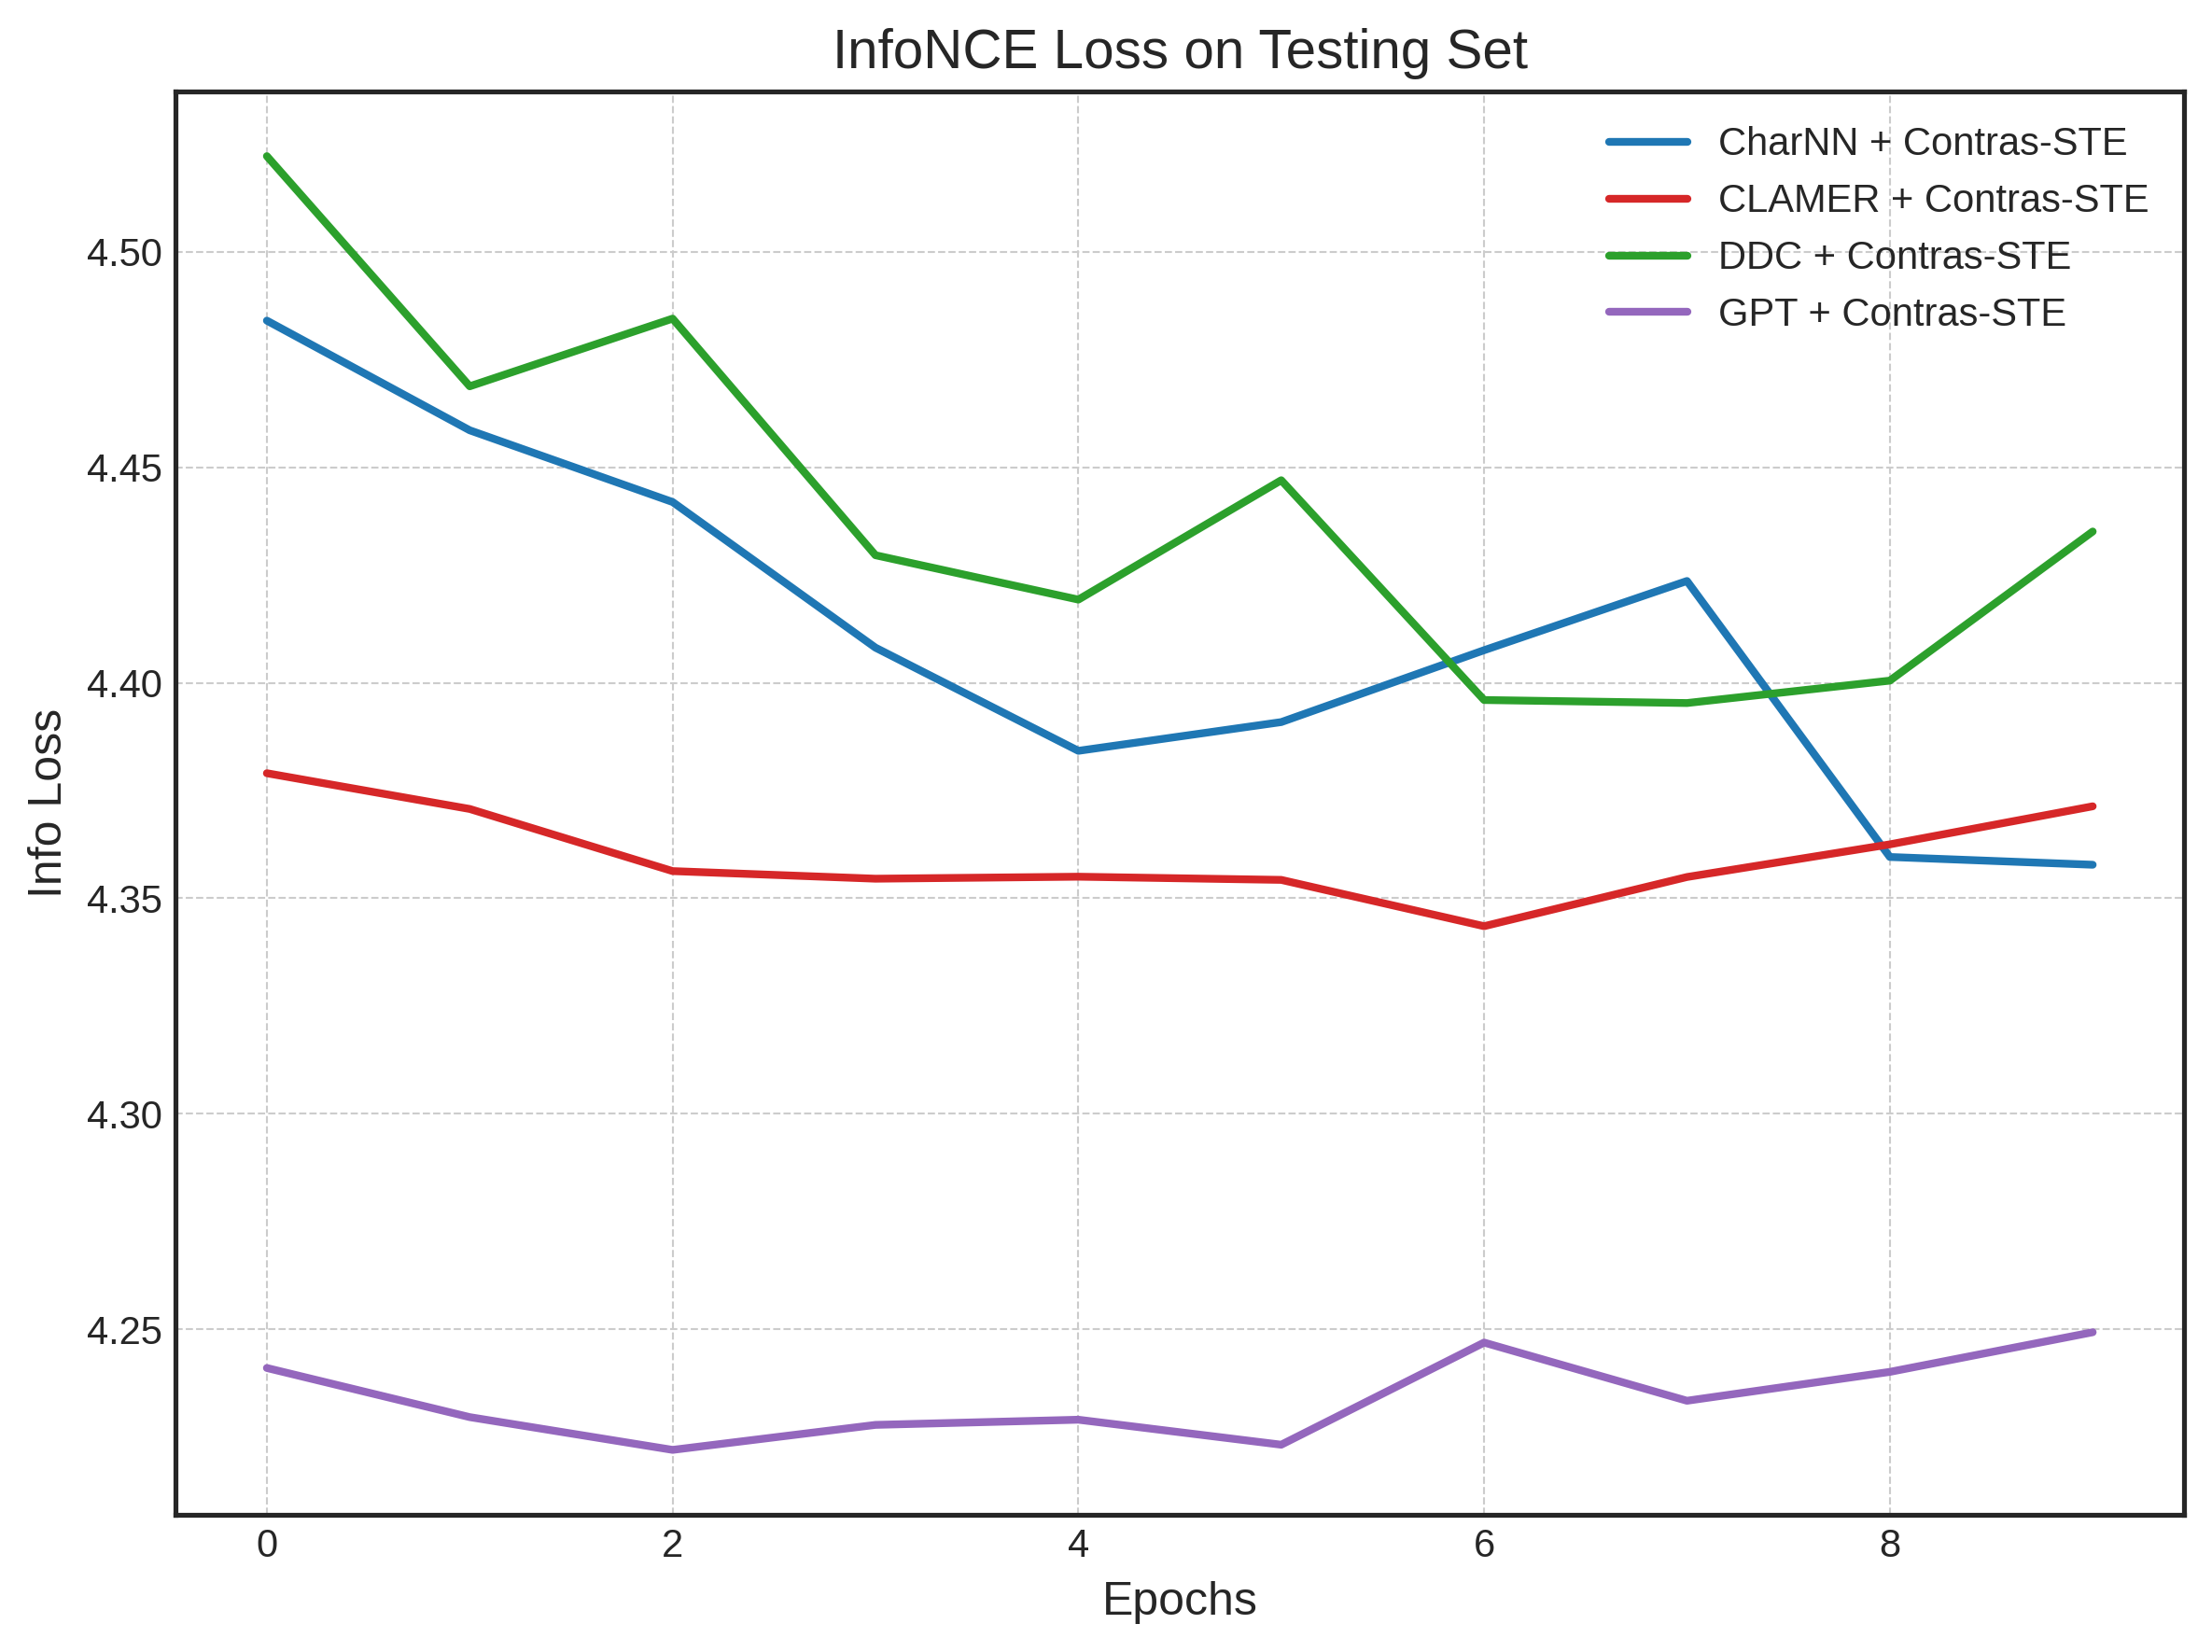

In [13]:
# plot the info_loss

# Set figure size and style
plt.figure(figsize=(8, 6), dpi=300)  # Higher DPI for better resolution
plt.style.use('seaborn-white')  # Clean background, which is typical for academic papers

# Plot the main testing info losses with solid lines
plt.plot(charnn_cl_test_info_loss, label='CharNN + Contras-STE', color='tab:blue', linewidth=2)
plt.plot(clamer_cl_test_info_loss, label='CLAMER + Contras-STE', color='tab:red', linewidth=2)
plt.plot(ddc_cl_test_info_loss, label='DDC + Contras-STE', color='tab:green', linewidth=2)
plt.plot(gpt_cl_test_info_loss, label='GPT + Contras-STE', color='tab:purple', linewidth=2)

# Adding labels, title, and legend
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Info Loss', fontsize=12)
plt.title('InfoNCE Loss on Testing Set', fontsize=14)
plt.legend(loc='upper right', fontsize=10)

# Adjust grid, limits, and ticks for clarity
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()  # Ensure everything fits without overlap

# Show the plot
plt.show()